<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/4%E7%AB%A0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os

path = os.getcwd()

print(path)

try:
    os.chdir(path + "/drive/My Drive/実践データ分析_100本ノック")
except:
    pass

os.getcwd()

/content


'/content/drive/My Drive/実践データ分析_100本ノック'

In [3]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=2e6bf4faef1a33389236b348c6a72c631ab08d650c981229ab4c92136213bcaa
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [4]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import japanize_matplotlib

%matplotlib inline

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactiveity = "all"

In [73]:
import glob

for f in glob.glob('./Data/4章/*.csv'):
  print(os.path.split(f)[1])

campaign_master.csv
class_master.csv
customer_master.csv
use_log.csv
customer_join.csv


In [74]:
import pathlib

d = {}

p_temp = pathlib.Path('./Data/4章').glob('*.csv')

for p in p_temp:
  print(p)
  f = p.name.split('.')[0] 
  df = pd.read_csv('./Data/4章/' + p.name)
  d[f]= df
  

Data/4章/campaign_master.csv
Data/4章/class_master.csv
Data/4章/customer_master.csv
Data/4章/use_log.csv
Data/4章/customer_join.csv


In [75]:
uselog = d['use_log']
display(uselog.isnull().sum())

customer = d['customer_join']
display(customer.isnull().sum())

log_id         0
customer_id    0
usedate        0
dtype: int64

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routing_flg             0
calc_date               0
membership_period       0
dtype: int64

#ノック３２：クラスタリングで顧客をグループ化

In [76]:
customer_clustering = customer[["mean","median","max","min","membership_period"]]
customer_clustering.iloc[:5]

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [78]:
customer_clustering_sc = sc.fit_transform(customer_clustering)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)

In [79]:
customer_clustering["cluster"]= clusters.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
customer_clustering

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,2
4188,10.000000,10.0,10,10,1,2
4189,8.000000,8.0,8,8,1,2
4190,11.000000,11.0,11,11,1,2


In [81]:
customer_clustering.columns = ["月内平均値","月内中央値","月内最大値","月内最小値","会員期間","cluster"]
customer_clustering.groupby("cluster").count()


,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,1334,1334,1334,1334,1334
1,763,763,763,763,763
2,846,846,846,846,846
3,1249,1249,1249,1249,1249


In [82]:
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,5.524239,5.375187,8.745877,2.687406,14.843328
1,3.054713,2.888598,4.756225,1.653997,9.263434
2,8.054608,8.039598,10.009456,6.160757,7.072104
3,4.677494,4.671337,7.232986,2.153723,36.915933


#ノック３４：クラスタリング結果の可視化

In [85]:
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]
pca_df

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3
...,...,...,...
4187,3.027933,1.139635,2
4188,5.064720,0.769684,2
4189,3.027933,1.139635,2
4190,6.083114,0.584708,2


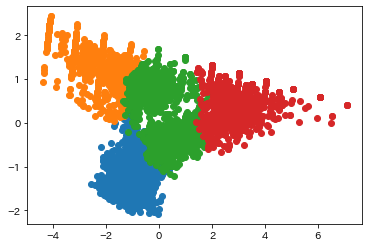

In [94]:
for i in customer_clustering["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0],tmp[1])